In [1]:
# clean the data and plot it in a scatter plot
# rules, if the record is IT then add 200 to the salary, just because
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Salaries.csv')

In [3]:
#display the first ten records
df.head(10)

,ID,Gender,Age,YearsExperience,IsIT,MonthsExperience,Salary,Created At,Updated At
0,1,M,27,1 years,Y,1.2 months,39343.0,2/21/2020 22:09,2/21/2020 22:09
1,2,F,25,1 years,N,3.6 months,46205.0,2/21/2020 22:09,2/21/2020 22:09
2,3,F,23,1 years,Y,0 months,NaN,2/21/2020 22:09,2/21/2020 22:09
3,4,M,44,1 years,N,6 months,37731.0,2/21/2020 22:09,2/21/2020 22:09
4,5,M,39,2 years,N,0 months,43525.0,2/21/2020 22:09,2/21/2020 22:09
5,6,M,42,2 years,N,2.4 months,39891.0,2/21/2020 22:09,2/21/2020 22:09
6,7,F,45,2 years,n,11 months,56642.0,2/21/2020 22:09,2/21/2020 22:09
7,8,F,45,1 years,y,0 months,NaN,2/21/2020 22:09,2/21/2020 22:09
8,9,F,32,3 years,n,0 months,60150.0,2/21/2020 22:09,2/21/2020 22:09
9,10,F,33,3 years,y,2.4 months,54445.0,2/21/2020 22:09,2/21/2020 22:09


In [4]:
#show the statistical data on the dataset
df.describe()

,ID,Age,Salary
count,35.000000,35.000000,31.000000
mean,18.000000,35.685714,70179.580645
std,10.246951,7.805622,42163.703160
min,1.000000,23.000000,-104523.000000
25%,9.500000,30.000000,56218.000000
50%,18.000000,35.000000,64445.000000
75%,26.500000,41.000000,99787.500000
max,35.000000,56.000000,122391.000000


In [5]:
# get only the columns that you only need
f_cols = ['IsIT', 'YearsExperience', 'MonthsExperience', 'Salary']
f_df = df[f_cols]

In [6]:
# show all the unique values in a column
f_df['IsIT'].unique()

array(['Y', 'N', 'n', 'y', nan], dtype=object)

In [7]:
# drop the records in the dataset where the IsIT column is nan
f_df = f_df.dropna(subset=['IsIT'])
f_df.head()

,IsIT,YearsExperience,MonthsExperience,Salary
0,Y,1 years,1.2 months,39343.0
1,N,1 years,3.6 months,46205.0
2,Y,1 years,0 months,NaN
3,N,1 years,6 months,37731.0
4,N,2 years,0 months,43525.0


In [8]:
# there are multiple things that is happening in the next line of code
# 1 you are applying a function (a lambda function or anonymous function) to the dataframe
# 2 now the x pertains to the passed variable to the lambda function
# 3 the axis parameter (axis = 1) dictates where the function will be applied to, 
# axis=0 means it will be applied to the columns, axis = 1 means rows
# click on the ff link to check out other details
# https://thispointer.com/pandas-apply-apply-a-function-to-each-row-column-in-dataframe/#:~:text=apply()%20calls%20the%20passed,instead%20of%20altering%20original%20dataframe.
# 4 since we have a row, we need to access the column IsIT and then convert it to lowercase
# 5 then we assign it back to the column IsIT of the dataframe
f_df['IsIT'] = f_df.apply(lambda x: x['IsIT'].lower(), axis=1)
f_df.head()

,IsIT,YearsExperience,MonthsExperience,Salary
0,y,1 years,1.2 months,39343.0
1,n,1 years,3.6 months,46205.0
2,y,1 years,0 months,NaN
3,n,1 years,6 months,37731.0
4,n,2 years,0 months,43525.0


In [9]:
# another way of writing the above lambda function is to use an actual function 
# and then pass it as a parameter in the apply method
# then you would need to return the new value for the column
def f(x):
    return x['IsIT'].lower()
f_df['IsIT'] = f_df.apply(f, axis=1)
f_df.head()

,IsIT,YearsExperience,MonthsExperience,Salary
0,y,1 years,1.2 months,39343.0
1,n,1 years,3.6 months,46205.0
2,y,1 years,0 months,NaN
3,n,1 years,6 months,37731.0
4,n,2 years,0 months,43525.0


In [10]:
# rules, if the record is IT then add 200 to the salary, just because
# how to do this? well you need to apply() a function to the salary column, so you need to access the columns per row
# define a custom function that will get the current row as x
def addTwoHundred(x):
    # check if the column IsIT is equal to y
    # if yes then add two hundred
    if x['IsIT'] == 'y':
        return x['Salary']+200
    # else return the original Salary
    else:
        return x['Salary']

f_df['Salary'] = f_df.apply(addTwoHundred, axis=1)
f_df.head()

,IsIT,YearsExperience,MonthsExperience,Salary
0,y,1 years,1.2 months,39543.0
1,n,1 years,3.6 months,46205.0
2,y,1 years,0 months,NaN
3,n,1 years,6 months,37731.0
4,n,2 years,0 months,43525.0


In [11]:
# fill in the missing salaries with the mean of the column
# now i could make this a lot more complicated by saying that the mean should be based on the YearsExperience but
# you could figure that out on your own, it includes using the apply() method again and then checking if the salary is nan
# if it is then get the mean for the records that has the same YearsExperience
# simple method
simple_df = f_df['Salary'].fillna(value=f_df['Salary'].mean())
simple_df.head()

0    39543.000000
1    46205.000000
2    69099.689655
3    37731.000000
4    43525.000000
Name: Salary, dtype: float64

In [12]:
# a more difficult one
difficult_df = f_df
def fillSalary(x):
    # check if the salary is nan
    if np.isnan(x['Salary']):
        # get the rows that has the same YearsExperience
        filtered_rows = f_df[f_df['YearsExperience'] == x['YearsExperience']]
        # get the salary mean of the filtered rows
        return filtered_rows['Salary'].mean()
    else:
        return x['Salary']
difficult_df['Salary'] = f_df.apply(fillSalary, axis=1)
difficult_df.head()

,IsIT,YearsExperience,MonthsExperience,Salary
0,y,1 years,1.2 months,39543.000000
1,n,1 years,3.6 months,46205.000000
2,y,1 years,0 months,41159.666667
3,n,1 years,6 months,37731.000000
4,n,2 years,0 months,43525.000000


In [13]:
# get the number of years from YearsExperience
difficult_df['YExp'] = difficult_df.apply(lambda x: x['YearsExperience'].split()[0], axis=1)
# convert the column to int
difficult_df['YExp'] = pd.to_numeric(difficult_df['YExp'])
difficult_df.head()

,IsIT,YearsExperience,MonthsExperience,Salary,YExp
0,y,1 years,1.2 months,39543.000000,1
1,n,1 years,3.6 months,46205.000000,1
2,y,1 years,0 months,41159.666667,1
3,n,1 years,6 months,37731.000000,1
4,n,2 years,0 months,43525.000000,2


In [14]:
# get number of months from MonthsExperience and convert it into years
difficult_df['MExp'] = difficult_df.apply(lambda x: float(x['MonthsExperience'].split()[0])/12, axis=1)
difficult_df.head()

,IsIT,YearsExperience,MonthsExperience,Salary,YExp,MExp
0,y,1 years,1.2 months,39543.000000,1,0.1
1,n,1 years,3.6 months,46205.000000,1,0.3
2,y,1 years,0 months,41159.666667,1,0.0
3,n,1 years,6 months,37731.000000,1,0.5
4,n,2 years,0 months,43525.000000,2,0.0


In [15]:
# add the two columns to year the TotalExperience
difficult_df['TotalExp'] = difficult_df['YExp']+difficult_df['MExp']
difficult_df.head()

,IsIT,YearsExperience,MonthsExperience,Salary,YExp,MExp,TotalExp
0,y,1 years,1.2 months,39543.000000,1,0.1,1.1
1,n,1 years,3.6 months,46205.000000,1,0.3,1.3
2,y,1 years,0 months,41159.666667,1,0.0,1.0
3,n,1 years,6 months,37731.000000,1,0.5,1.5
4,n,2 years,0 months,43525.000000,2,0.0,2.0


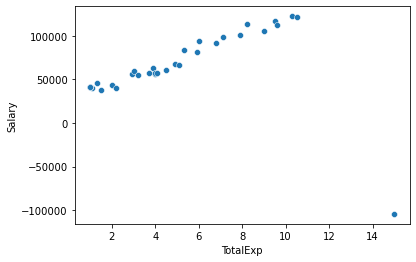

In [16]:
# plot the scatter plot
import seaborn as sns
sns.scatterplot(x='TotalExp', y='Salary', data=difficult_df);

In [17]:
# you see that point right at the edge? a negative salary, means that cleaning is not yet done
# describe again the dataframe to see the min value of salary
difficult_df.describe()

,Salary,YExp,MExp,TotalExp
count,33.000000,33.000000,33.000000,33.000000
mean,65713.020202,4.727273,0.318687,5.045960
std,41242.690682,3.421191,0.337674,3.461532
min,-104323.000000,1.000000,0.000000,1.000000
25%,43525.000000,2.000000,0.000000,2.200000
50%,60150.000000,4.000000,0.200000,4.100000
75%,93940.000000,7.000000,0.500000,7.100000
max,122391.000000,15.000000,0.916667,15.000000


In [18]:
# drop the row that contains negative salary
# first get the indices of the rows that has a salary of less than 1
index_names = difficult_df[difficult_df['Salary'] < 1].index
# drop the rows using the indices then save it inplace
difficult_df.drop(index_names , inplace=True)

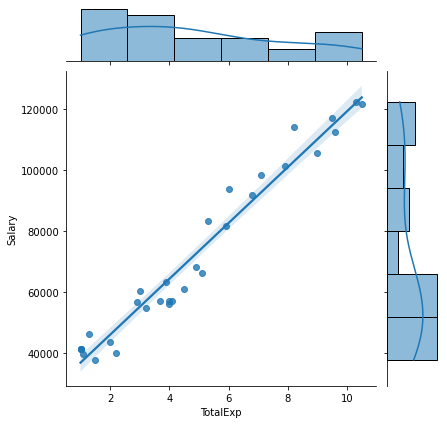

In [19]:
# display the plot again
sns.jointplot(x='TotalExp', y='Salary', data=difficult_df, kind='reg')